<a href="https://colab.research.google.com/github/garg1709/Hamoye-Data-Science-Internship/blob/main/ML_Classification_Managing_Quality_Metric_of_Global_Ecological_Footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/garg1709/Hamoye-Data-Science-Internship/main/ML%20Classification%20Quality%20Metric%20of%20Global%20Footprint/Data_for_UCI_named.csv'
df = pd.read_csv(url, sep=',')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.drop(columns = 'stab', axis=1, inplace=True)

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
X = df.drop('stabf', axis=1)
y = df[['stabf']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_df = sc.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_df, columns = X_train.columns)
X_test_df = sc.transform(X_test)
X_test_df = pd.DataFrame(X_test_df, columns = X_test.columns)

In [10]:
# Q.9
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=1)

In [11]:
pred = rfc.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9228

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      stable       0.90      0.88      0.89       884
    unstable       0.93      0.95      0.94      1616

    accuracy                           0.92      2500
   macro avg       0.92      0.91      0.91      2500
weighted avg       0.92      0.92      0.92      2500



In [14]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)
etc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(random_state=1)

In [15]:
f = etc.feature_importances_

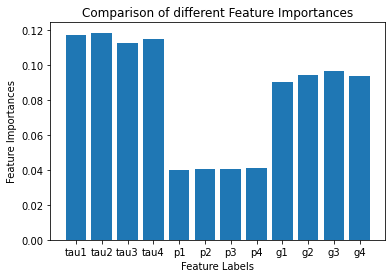

In [16]:
# Q.18
plt.bar(X_train.columns, f)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [17]:
random_grid = {'n_estimators': [500,300,1000,100],

'max_features': ['log2','auto','None'],

'min_samples_split': [2,5,7],

'min_samples_leaf': [8,6,4],

}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
rfvc = RandomizedSearchCV(estimator = etc, param_distributions = random_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

rfvc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['log2', 'auto',
                                                         'None'],
                                        'min_samples_leaf': [8, 6, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [500, 300, 1000, 100]},
                   random_state=1, scoring='accuracy', verbose=1)

In [19]:
# Q.20
rfvc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto'}

In [20]:
pred8 = rfvc.predict(X_test)

In [21]:
# Q.7 
accuracy_score(y_test, pred8)

0.922

In [22]:
pred1 = etc.predict(X_test)

In [23]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

      stable       0.94      0.84      0.89       884
    unstable       0.92      0.97      0.94      1616

    accuracy                           0.92      2500
   macro avg       0.93      0.90      0.91      2500
weighted avg       0.93      0.92      0.92      2500



In [24]:
# Q.10
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(random_state=1)

In [25]:
pred2 = xgb.predict(X_test)

In [26]:
accuracy_score(y_test, pred2)

0.9124

In [27]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

      stable       0.90      0.84      0.87       884
    unstable       0.92      0.95      0.93      1616

    accuracy                           0.91      2500
   macro avg       0.91      0.90      0.90      2500
weighted avg       0.91      0.91      0.91      2500



In [28]:
# Q.11
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state = 1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=1)

In [29]:
pred3 = clf.predict(X_test)

In [30]:
accuracy_score(y_test, pred3)

0.938

In [31]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

      stable       0.91      0.91      0.91       884
    unstable       0.95      0.95      0.95      1616

    accuracy                           0.94      2500
   macro avg       0.93      0.93      0.93      2500
weighted avg       0.94      0.94      0.94      2500

